<a href="https://colab.research.google.com/github/JosephDonoso/ADA-Informes/blob/main/Informe_CorteVarilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informe Corte de varilla y programación dinámica**

## **1. Problema: Optimización**
>Dado un arreglo $p$ de precios de una varilla por su tamaño y un tamaño para la varilla $n$, encontrar la forma en la que se debería cortar la varilla y vender sus partes de tal manera que se obtenga el mayor beneficio posible.

**Entrada:** Una variable $n$ que denota el largo total de la varilla y un arreglo de precios $p[i-1]$ para cada tamaño de varilla $i$, donde $1≤i≤n$.

**Salida:** El máximo beneficio obtenido al cortar la varilla y vender sus partes $r_n$, además de un arreglo con los cortes necesarios $c[$ $]$.

## **2. Corte de varilla**

### **2.1. Descripción del algoritmo**

El corte de varilla es un problema de optimización para maximizar el beneficio obtenido al vender por partes una varilla. Se puede describir de la siguiente forma, una fábrica de elaboración y venta de varillas de un tamaño constante de $n$ pulgadas, tiene un listado de precios para vender tal varilla por partes, estos precios varían según las pulgadas del corte, ya que es posible vender una varilla con el tamaño de una pulgada hasta la varilla sin ningún corte, es decir, con el tamaño de $n$ pulgadas. Lo que se requiere es buscar la forma más óptima de cortar la varilla para obtener el mayor beneficio posible vendiendo sus partes, lo que significa que probaremos cada modo de corte posible con el fin de comparar todas las combinaciones por la ganancia que se obtendría y llegar a la que produzca mayor beneficio.
Una varilla de un tamaño de 4 pulgadas puede ser cortada de las siguientes maneras:

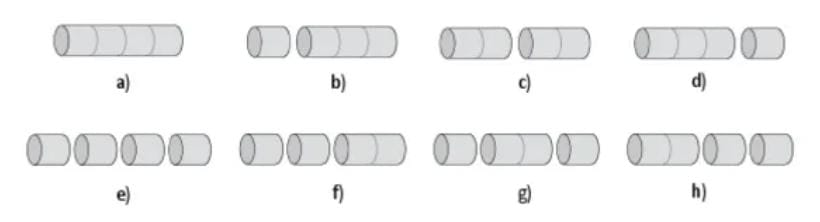

Observando la imagen anterior, nos podemos dar cuenta que existen $2^{n-1}$ formas en las que podemos cortar una varilla. También nos podemos dar cuenta que luego de los cortes en b), c) y d), los demás son solo variantes de cortes del "resto de la varilla" (porción de varilla que queda a la derecha luego del corte), lo que podemos desarrollar en una **subestructura óptima** que tendrá la siguiente forma:

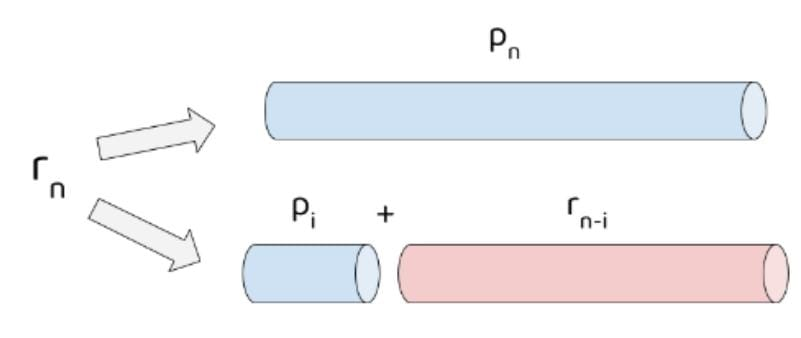

Donde $r_n$ es el problema de obtener la máxima ganancia para el largo de varilla $n$, este valor podrá ser el precio de la varilla sin cortar $p_n$ ó el precio del corte de la primera porción de la varilla $p_i$ más el precio máximo obtenido vendiendo por partes el "resto de la varilla" $r_{n-i}$.

A la hora de implementar una solución al problema, una opción es definir un algoritmo recursivo, donde para calcular el máximo beneficio de un tamaño $r_n$ se debe evaluar el $max(p_i + r_{n-i})$, con $i$ desde $1$ hasta $n$ y considerar que un tamaño de varilla 0 tiene un máximo beneficio asociado igual a 0, $r_0 = 0$.

De esta forma consideraremos que el problema inicial puede ser resuelto al procesar y resolver cada subproblema con un tamaño menor de varilla. Aun así, esta metodología es ineficiente, ya que en repetidas ocasiones existen gran cantidad de problemas solapados, es decir, que se presenta el mismo subproblema más de una vez, lo que evidentemente es ineficiente, y es en estas situaciones donde es de gran ayuda la programación dinámica para guardar cada solución obtenida de un subproblema y utilizarlas cuando estos se repitan. En la sección 5 se describirá el árbol formado con subproblemas solapados en comparación con el árbol formado con programación dinámica donde no se resuelve más de una vez cada subproblema.

### **2.2. Implementación de la variante recursiva (Corte de varilla)**

In [2]:
#Módulos
import random
from sys import maxsize
from copy import deepcopy
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

In [3]:
#Inicializador de precios
def cutrod_instance_generator(N):
  A = []
  prev = 0
  #Itera hasta n elementos
  for i in range(N):
    r=random.randint(0,10) #Obtiene elemento random, rango = [0,10]
    #Agrega al arreglo de precios el acumulativo del elemento anterior y el actual
    A.append(prev+r) 
    prev+=r #Actualiza el acumulativo
  return A #Retorna el arreglo de precios

cutrod_instance_generator(10)

[4, 13, 19, 26, 31, 35, 39, 41, 41, 48]

In [4]:
def CutRod(precios, largo, verbose = False,solucion = [], recursiones = 0):
  if largo == 0: #Caso base, ya no queda varilla que cortar
    return 0, solucion, recursiones 
    #Retorn el precio 0 y los cortes realizados hasta el momento

  if(verbose):
      print("Varilla: ", end = "")
      for k in range(largo):
        print("-", end = "")

  maximo = -maxsize #Inicializar el máximo en el valor más pequeño posible
  for i in range(1, largo+1): #Se recorren todos los posibles cortes
    copiaSolucion = deepcopy(solucion)
    copiaSolucion.append(i)#Se crea una solución distinta para cada corte

    if(verbose):
      print("\nVarilla cortada: ", end = "")
      for k in range(i):
        print("-", end = "")
      print(" ", end = "")
      for k in range(largo-i):
        print("-", end = "")
      print("\nGanacia por el primer corte:", precios[i-1])
      if(i == largo):
        print("No hay resto de varilla para calcular máximo beneficio")
      else:
        print("Llamada recursiva para calcular el máximo beneficio para el resto de la varilla:", largo-i)
    #Se retorna la maxima ganancia de vender el   
    #resto de varilla y la solución de cortes
    recursiones += 1
    ganancia, cortes, recursiones = CutRod(precios, largo-i, verbose, copiaSolucion, recursiones)

    #Se compara si se consiguió superar la máxima ganancia posible
    if maximo < precios[i-1] + ganancia:
      #En este caso, se actualiza el máximo 
      maximo = precios[i-1] + ganancia
      #y se actualiza la solución auxiliar para esta recursion
      maxGananciaCortes = cortes

  solucion = maxGananciaCortes
  #Retorna la solución de la recursión y el máximo obtenido
  if(verbose):
    print("El máximo beneficio para una varilla de largo", largo, "es:", maximo)
  return maximo, solucion, recursiones

In [5]:
arr = [1, 5, 8, 9, 10, 17, 17, 20]
n  = len(arr)
r, s, recursiones = CutRod(arr, n)
print("Ganancia máxima:", r)
print("Cortes: "+ str(s)[1:-1])
print("Recursiones: ", recursiones)

Ganancia máxima: 22
Cortes: 2, 6
Recursiones:  255


### **2.3. Descripción del algoritmo empleando programación dinámica**

La programación dinámica utiliza uno de los siguientes métodos para resolver subproblemas y luego utilizarlos cuando vuelvan a repetirse:

**Bottom-up** utiliza la estrategia de construir los casos individuales más pequeños de un problema para luego enlazarlos y componer subproblemas más grandes hasta dar con la solución. El proceso se realiza de manera iterativa guardando en una tabla los valores obtenidos en cada nivel, para luego utilizarlos cuando se encuentre ante el mismo subproblema.
**Top-down**, por el contrario, es bastante utilizado en algoritmos recursivos dado que la estrategia que utilizan estos algoritmos es la de definir un problema sin demasiado detalle, para luego redefinir el problema con llamadas recursivas, pero cada vez con mayor detalle. El método que se lleva a cabo es el de utilizar un arreglo de datos nulos o un mapa, para guardar los resultados obtenidos de cada recursión, con el fin de que si se repite alguna recursión con igual problema que uno ya resuelto, entonces se entregue directamente la solución. La técnica de optimización que se usa para almacenar los resultados de la llamada de una subrutina en una memoria intermedia o búfer, devolviendo esos mismos valores cuando se llame de nuevo a la misma subrutina o función, es llamado **Memoización**.

El próximo algoritmo resuelve el proglema del corte de varilla utilizando Bottom-up. Funcionaría de la siguiente forma:

1.   Se resuelve el subroblema$_0$, para $n = 0$ la respuesta es 0.
2.   Se resuelve el subproblema$_1$ haciendo uso del subroblema$_0$, para $n = 1$ la respuesta es el valor de una varilla de largo $1$.
3.   Se repite el proceso. Se resuelve el subproblema$_i$ haciendo uso de los subproblema$_{i-j}$ (iteraciones previas), para $n = i$ la respuesta es el $max(p[j]+subproblema_{i-j})$ con $j$ desde $1$ hasta $i$
4.   Se finaliza el proceso al resolverse el subproblema$_n$ de la misma forma que los anteriores.



### **2.4. Implementación de acercamiento Bottom-up (programación dinámica) para resolver el problema del corte de varillas**

In [6]:
def print_CutRod(p,n):
  r, s, cont, comp = Bottom_Up_CutRod(p,n)
  #calcula el arreglo solución

  print("Cortes: ", end = "")
  while(n > 0): #Para cada largo indica el primer corte realizado
    print(s[n], end = " ") #Se imprime
    n = n - s[n] #Se busca el largo para el siguiente corte realizado

In [7]:
def Bottom_Up_CutRod(p,n, verbose = False, cont = 0, comp = 0):
  r = [0 for i in range(n+1)] #Se crean los arreglos de precios maximos
  s = [0 for i in range(n+1)] #y de las soluciones

  #Se iteran desde los subproblemas de tamaño 1 hasta los de tamaño n
  for j in range(1, n + 1 ):

    if(verbose):
      print("Varilla: ", end = "")
      for k in range(j):
        print("-", end = "")
      print("")

    #Se calcula el máximo beneficio obtenido por cada uno de los subproblemas
    q = -maxsize
    #El mismo procedimiento de su variante recursiva, con la diferencia de que al
    #calcular los primeros problemas, utilizaremos su solución para el siguiente
    for i in range(1, j + 1 ):

      if(verbose):
        if(i == j):
          print("La varilla completa se vende: ", end = "")
          for k in range(i):
            print("-", end = "")
          print("")
          print("Ganacia obtenida:", p[i])
        else:
          print("Varilla cortada: ", end = "")
          for k in range(i):
            print("-", end = "")
          print(" ", end = "")
          for k in range(j-i):
            print("-", end = "")
          print("\nGanacia por el primer corte:", p[i])
          print("Ganacia por el resto del corte:", r[j - i])
       
      comp += 1 #Contador de comparaciones por cada subproblema
      if q < p[i] + r[j - i]:#Se utilizó la solución anterior
        q = p[i] + r[j - i]
        s[j] = i
    cont += 1 #Contador de subproblemas resueltos
    r[j] = q #Se guarda la solución del subproblema actual

    if verbose:
      print("El máximo beneficio para una varilla de largo", j, "es:", r[j]);
      print("")
  return r, s, cont, comp

In [8]:
arr = [0, 1, 5, 8, 9, 10, 17, 17, 20]
n  = len(arr)-1
r, s, cont, comp = Bottom_Up_CutRod(arr, n)
print("Ganancia máxima:", r[n])
print("Cantidad de subproblemas resueltos:", cont)
print("Cantidad total de comparaciones para obtener el máximo beneficio en cada subproblema:", comp)
print_CutRod(arr,n)

Ganancia máxima: 22
Cantidad de subproblemas resueltos: 8
Cantidad total de comparaciones para obtener el máximo beneficio en cada subproblema: 36
Cortes: 2 6 

## **3. Ejecución paso a paso**

### **3.1. Variante recursiva con opción Verbose = True**

In [9]:
arr = [1, 5, 8, 9, 10]
n  = len(arr)
r, s, recursiones = CutRod(arr, n, True)
print("Ganancia máxima:", r)
print("Cortes: "+ str(s)[1:-1])
print("Recursiones: ", recursiones)

Varilla: -----
Varilla cortada: - ----
Ganacia por el primer corte: 1
Llamada recursiva para calcular el máximo beneficio para el resto de la varilla: 4
Varilla: ----
Varilla cortada: - ---
Ganacia por el primer corte: 1
Llamada recursiva para calcular el máximo beneficio para el resto de la varilla: 3
Varilla: ---
Varilla cortada: - --
Ganacia por el primer corte: 1
Llamada recursiva para calcular el máximo beneficio para el resto de la varilla: 2
Varilla: --
Varilla cortada: - -
Ganacia por el primer corte: 1
Llamada recursiva para calcular el máximo beneficio para el resto de la varilla: 1
Varilla: -
Varilla cortada: - 
Ganacia por el primer corte: 1
No hay resto de varilla para calcular máximo beneficio
El máximo beneficio para una varilla de largo 1 es: 1

Varilla cortada: -- 
Ganacia por el primer corte: 5
No hay resto de varilla para calcular máximo beneficio
El máximo beneficio para una varilla de largo 2 es: 5

Varilla cortada: -- -
Ganacia por el primer corte: 5
Llamada recur

### **3.2. Variante iterativa con opción Verbose = True**

In [10]:
arr = [0, 1, 5, 8, 9, 10]
n  = len(arr)-1
r, s, cont, comp = Bottom_Up_CutRod(arr, n, True)
print("Ganancia máxima:", r[n])
print("Cantidad de subproblemas resueltos:", cont)
print("Cantidad total de comparaciones para obtener el máximo beneficio en cada subproblema:", comp)
print_CutRod(arr,n)

Varilla: -
La varilla completa se vende: -
Ganacia obtenida: 1
El máximo beneficio para una varilla de largo 1 es: 1

Varilla: --
Varilla cortada: - -
Ganacia por el primer corte: 1
Ganacia por el resto del corte: 1
La varilla completa se vende: --
Ganacia obtenida: 5
El máximo beneficio para una varilla de largo 2 es: 5

Varilla: ---
Varilla cortada: - --
Ganacia por el primer corte: 1
Ganacia por el resto del corte: 5
Varilla cortada: -- -
Ganacia por el primer corte: 5
Ganacia por el resto del corte: 1
La varilla completa se vende: ---
Ganacia obtenida: 8
El máximo beneficio para una varilla de largo 3 es: 8

Varilla: ----
Varilla cortada: - ---
Ganacia por el primer corte: 1
Ganacia por el resto del corte: 8
Varilla cortada: -- --
Ganacia por el primer corte: 5
Ganacia por el resto del corte: 5
Varilla cortada: --- -
Ganacia por el primer corte: 8
Ganacia por el resto del corte: 1
La varilla completa se vende: ----
Ganacia obtenida: 9
El máximo beneficio para una varilla de largo 4

En la ejecución paso a paso, se presenta como varilla al subproblema actual calculado, y por varilla cortada se refiere a la forma de dividir el subproblema actual, luego se combinan las soluciones para obtener el máximo beneficio para ese subproblema.

## **4. Correctitud del algoritmo de Corte de varilla con Bottom-up**

### **Teorema**
*El algoritmo **Bottom_Up_CutRod** en cada iteración retorna el máximo beneficio posible para vender la varilla de largo $n$.*

#### **Por inducción matemática**

##### **Caso base:** Cuando la varilla es de largo $n = 0$, entonces su valor debe ser $0$, puesto que se puede inferir que con longitud $0$ "no existe varilla la cual vender".

##### **Paso inductivo:**
Cuando la varilla es de un largo $n$, con $n$ entre $1$ y el máximo largo al que podremos vender una varilla, entonces obtendremos el máximo beneficio posible a partir de la instrucción.
> $r(n) = max(p(i)+r(n-i),p(n))$

Donde podremos identificar 2 posibles casos:


1.   Cuando es mayor $p(n)$ significa que el máximo beneficio posible para vender la varilla de largo $n$ será el valor de la misma, $r(n) = p(n)$

2.   Cuando es mayor $p(i) + r(n-i)$ significa que el máximo beneficio posible se obtiene cortando la varilla, vendiendo el primer trozo y calculando la máxima ganancia para el trozo restante, $r(n) = p(i) + r(n-i)$. El beneficio máximo para una varilla de largo $n-i$ fue resuelto en iteraciones anteriores, por lo que siempre retornará la mayor ganacia para un subproblema $r(n-i)$.




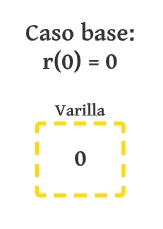

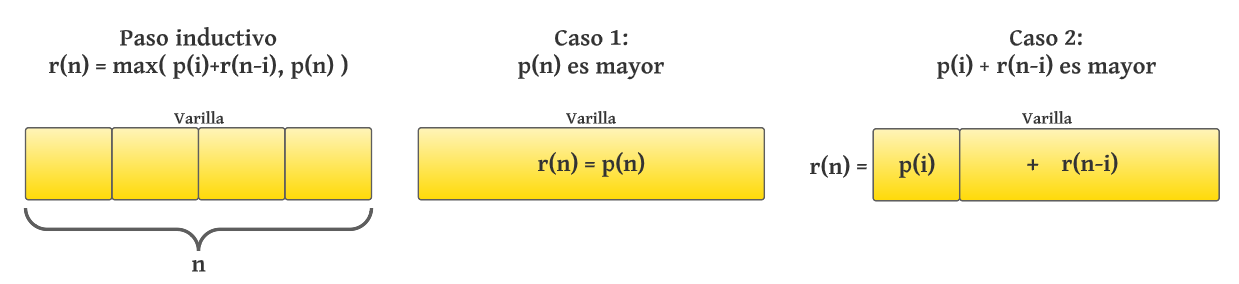

## **5. Tiempo de ejecución**

### **5.1. CutRod (recursivo sin programación dinámica)**

#### **Teorema**
*El algoritmo **CutRod** tiene un tiempo de ejecución $O(2^n)$.*

#### **Función recursiva**
Se define una función recursiva que modele la división del problema original $T(n)$:
>$T(n) = ∑_{j=0}^{n-1}T(j) + 1$

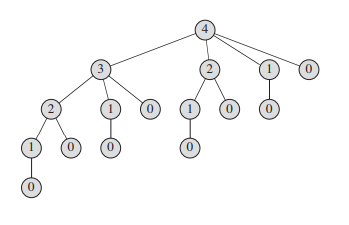

#### **Método de sustitución**
Ahora, usando el método de sustitución, probaremos que $O(2^n)$ es efectivamente una cota superior asintótica para $T(n)$.

Debemos probar que $T(n) \leq c · 2^n$, para algún valor de $c>0$.
Para ello, asumimos que esto es cierto (inducción) y **sustituimos en la recursión**, los valores de $T(n)$ por $c · 2^n$:

>$T(n) \leq ∑_{j=0}^{n-1}c · 2^j + 1 \leq c · 2^n$
>
>$T(n) \leq c · (2^n-1) + 1 \leq c · 2^n$
>
>$T(n) \leq c · 2^n - c + 1 \leq c · 2^n$
>
>$-c \leq -1$
>
>$c ≥ 1$ 

Por lo que efectivamente $c⋅2^n=O(2^n)$ es una cota asintótica superior para el algoritmo.

### **5.2. Bottom_Up_CutRod (iterativo con programación dinámica)**

#### **Teorema**
*El algoritmo **Bottom_Up_CutRod** tiene un tiempo de ejecución $O(n^2)$.*

Para calcular el tiempo de ejecución del algoritmo se utilizará la siguiente fórmula obtenida del libro Algorithms Illuminated (Parte 4, página 107):

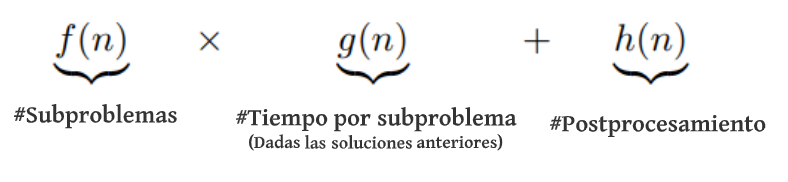

Entonces para obtener el tiempo de ejecución del algoritmo $T(n)$, primeramente debemos calcular las 3 funciones anteriores:

1.   $f(n)$: Se refiere a la cantidad de subproblemas en resolver. Para una varilla de largo $n$, resulta en una cantidad de $n$ subproblemas.

2.   $g(n)$: Se refiere al tiempo estimado por resolver cada subproblema, este varía en función del tamaño de varilla del subproblema actual a resolver. Se calcula como la cantidad de soluciones anteriores al subproblema actual de largo $j$.

3.   $h(n)$: Se refiere al tiempo de ejecución en procesar la solución. En este caso es despreciable el valor de esta función, ya que buscamos una cota superior para el algoritmo y lo calculado es de orden $O(1)$ en instrucciones para almacenar la solución dinámicamente.

Reemplazando obtendremos:
>$T(n) = \sum_{j=1}^{n}\sum_{i=1}^{j}·c$
>
>$T(n) = c·\sum_{j=1}^{n}j$
>
>$T(n) = c·\frac{n(n+1)}{2}$
>
>$T(n) = c·(\frac{n^2}{2}+\frac{n}{2})$
>
>$T(n) = O(n^2)$





#### **Complejidad espacial**
*El algoritmo **Bottom_Up_CutRod** tiene una complejidad espacial $O(n)$.*

Se obtiene el orden $O(n)$ en base a la cantidad de subproblemas anteriores utilizados para resolver el subproblema actual. Representación de subproblemas resueltos y los subproblemas anteriores utilizados para la solución:

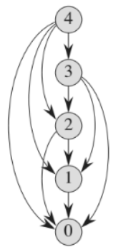

Para el ejemplo anterior, con un largo de varilla igual a 4, solo se necesito almacenar los problemas anteriores a este, los cuales son 4-1, además para retornar la solución final al problema se necesita almacenar un subproblema más, el del 4. En términos generales, para resolver cualquier problema $n$ es necesario almacenar $n-1$ soluciones anteriores y para retornar la solución actual $n-1+1$, lo que da un total de $n$ subproblemas, por este motivo la cantidad de memoria requerida es de orden $O(n)$.



## **6. Experimentos**

### **6.1. Tiempo de ejecución CutRod v/s Bottom_Up_CutRod**

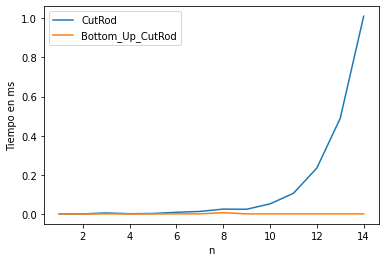

In [20]:
x=[]
y_Dynamic = []
y_NoDynamic = []

for n in range(1,15):
  a = cutrod_instance_generator(n)
  b = deepcopy(a)
  b.insert(0, 0)
  
  #la función repeat está ejecutando 20 veces Bottom_Up_CutRod con el arreglo b y retorna el mejor tiempo obtenido.
  t_Dynamic = repeat(setup="from __main__ import Bottom_Up_CutRod", stmt=f"Bottom_Up_CutRod({b},{n})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces CutRod con el arreglo a y retorna el mejor tiempo obtenido.
  t_NoDynamic = repeat(setup="from __main__ import CutRod", stmt=f"CutRod({a},{n})", repeat=1, number=10)

  x.append(n)
  y_Dynamic.append(t_Dynamic)
  y_NoDynamic.append(t_NoDynamic)

plt.plot(x,y_NoDynamic)
plt.plot(x,y_Dynamic)
plt.legend(["CutRod","Bottom_Up_CutRod"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Es bastante evidente que al utilizar la programación dinámica se optimiza en gran medida el algoritmo. La variante CutRod dibuja una curva exponencial al igual que se habia predicho en el tiempo de ejecución, mientras que la variante Bottom-up tan solo debería tener una curva cuadrática que no se logra apreciar por la escala del gráfico.

La gran diferencia entre ambos se debe a que en función de un largo de varilla mayor, la cantidad de procesos que se repiten en CutRod crece de forma exponencial al tener que recalcularse en repetidas ocasiones los mismos subproblemas, dificultad que no presenta Bottom_Up_CutRod, ya que nunca repite más de una vez un subproblema.

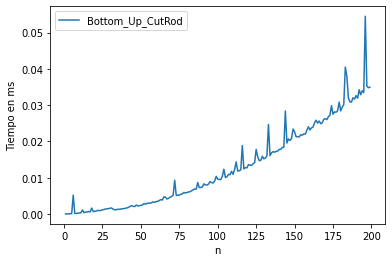

In [31]:
x=[]
y_Dynamic = []

for n in range(1,200):
  b = cutrod_instance_generator(n)
  b.insert(0, 0)
  
  #la función repeat está ejecutando 20 veces Bottom_Up_CutRod con el arreglo b y retorna el mejor tiempo obtenido.
  t_Dynamic = repeat(setup="from __main__ import Bottom_Up_CutRod", stmt=f"Bottom_Up_CutRod({b},{n})", repeat=1, number=10)

  x.append(n)
  y_Dynamic.append(t_Dynamic)

plt.plot(x,y_Dynamic)
plt.legend(["Bottom_Up_CutRod"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Podemos apreciar en el gráfico anterior la forma de la curva construida por Bottom_Up_CutRod, que guarda similitud con una función cuadrática, al igual que la cota superior calculada para el algoritmo en la sección 5 de tiempo de ejecución.

### **6.2. Cantidad de subproblemas en función del largo Bottom_Up_CutRod**


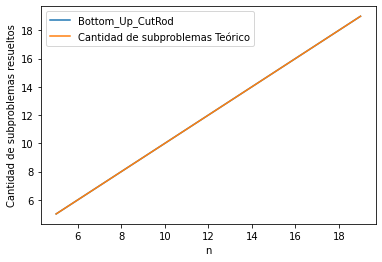

In [33]:
import matplotlib.pyplot as plt

x=[n for n in range(5,20)] 
y_TheoCant=[n for n in range(5,20)] # La cantidad teórica de subproblemas en resolver
y_cant=[]; 

for n in range(5,20):
  a = cutrod_instance_generator(n)
  a.insert(0, 0)
  r, s, cont, comp = Bottom_Up_CutRod(a,n)
  y_cant.append(cont)

plt.plot(x,y_cant)
plt.plot(x,y_TheoCant)
plt.legend(["Bottom_Up_CutRod", "Cantidad de subproblemas Teórico"])

plt.xlabel('n')
plt.ylabel('Cantidad de subproblemas resueltos')
plt.show()

Podemos observar que la predicción de subproblemas que resuelve el algoritmo es correcta, en función del largo de la varilla $n$, el algoritmo resuelve $n$ subproblemas, ya que utiliza la técnica Bottom-up, es decir, los subproblemas son resueltos desde el $1$ hasta $n$.

### **6.3. Cantidad de llamadas a subproblemas anteriores en función del largo Bottom_Up_CutRod**


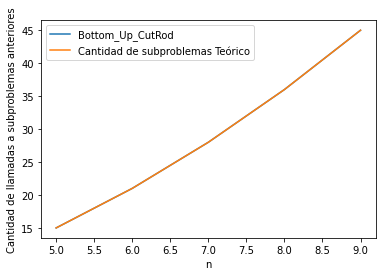

In [36]:
import matplotlib.pyplot as plt

x=[n for n in range(5,20)] 
y_TheoComp=[(n*(n+1))/2 for n in range(5,20)] # La cantidad teórica de comparaciones
y_comp=[];                          # para obtener el máximo beneficio de cada subproblema

for n in range(5,20):
  a = cutrod_instance_generator(n)
  a.insert(0, 0)
  r, s, cont, comp = Bottom_Up_CutRod(a,n)
  y_comp.append(comp)

plt.plot(x,y_comp)
plt.plot(x,y_TheoComp)
plt.legend(["Bottom_Up_CutRod", "Cantidad de subproblemas Teórico"])

plt.xlabel('n')
plt.ylabel('Cantidad de llamadas a subproblemas anteriores')
plt.show()

Por lo que se puede observar, también es correcto afirmar que la cantidad de llamadas a subproblemas anteriores en función de $n$ es $\sum_{i=1}^{n}i$, esto se debe a que el algoritmo en cada iteración $i$ debe utilizar $i$ problemas ya resueltos para obtener la solución (se considera el subproblema 0).